WILLIAM ANDRÉS GÓMEZ ROA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TAREA 3 - INTELIGENCIA ARTIFICIAL

### "Para cada punto de estos resumir en dos párrafos, por favor no copien y peguen. Intenten ustedes mismos hacerlo a partir de las lecturas que hay en las muchas fuentes que tienen a su alcance."

### 1. Averiguar qué es es el "coefficient of determination" y en que tipo de problemas de aprendizaje supervisado se usa.
### 2. Intervalo de valores que toma y explicarlos. 
### 3. Importa el orden de los argumentos de la entrada en la función de Sklearn? exlique que son.y por que importa. 
### 4. Qué significa si da negativo o cero? puede pasar? antes de elevar por supuesto.
### 5. Hallar el R cuadrado a nuestros datos de resistencia obtenidos a partir de una hipótesis lineal de 2 parámetros, cuanto les da!
### 6. Revisar paquetes de visualización: https://seaborn.pydata.org/tutorial/regression.html. Averigüe cómo o puede representar una regresión usando seaborn y que gráficas hay disponibles para representar regresiones.

## COEFICIENTE DE DETERMINACIÓN : R^2

Es una estadistica utilizada para evaluar el modelo lineal. Indica en que cantidad se puede predecir la varianza de la variable dependiente Y (eqtiqueta), a partir de las variables independientes X (caracteristicas). 

Esta métrica es utilizada principalmente en problemas supervisados de regresión y proporciona una medida útil del poder predictivo de los modelos de regresión.


## INTERVALOS DE VALORES QUE TOMA Y EXPLICARLOS

El intervalo de R-cuadrado que permite determinar cuanto de la varianza de la variable independiente se está  explicando por las variables dependientes es de 0 a 1. Sin embargo es posible que el resultado de la ecuación sean valores negativos, lo cual implica únicamente que el modelo se ajusta peor que una linea horizontal que pasa por la media de los datos. En general se obtienen valores entre (0,1) que representan la explicabilidad de la varianza de Y con nuestro modelo lineal, que es un rango difuso desde malo hasta bueno.  

Un valor de 1 indica que el modelo explica toda la variabilidad de los datos, lo cúal es el caso ideal que se espera, pero obtenerlo en la vida real es una alerta de que algo no esta bien, ya que obtener 1.0 exactamente con un modelo de datos reales no acontaría mucho para casos externos al dataset , es decir se trata de overfitting.

## IMPORTA EL ORDEN EN r2_score() DE SKLEARN?
Si ya que en el caso de esta librería se ha implementado la función como:

R2= 1 - (SSres / SStot)

Donde SStot Es la variación total de los datos o la suma total al cuadrado, este témrino no tiene problemas de signo por el cuadrado, sin embargo SSres es la suma de los cuadrados de los residuos que es la diferencia entre los valores reales y los valores predichos por el modelo.

Por esto, el orden si importa especificamente en esta implementación de esta librería.


##  QUE SIGNIFICA SI DA NEGATIVO O CERO? PUEDE PASAR? ANTES DE ELEVAR POR SU PUESTO.

Como se mencionó antes si puede dar negativo y esto significa que el modelo es peor que la media de los datos para predecir la varianza de la variable independiente. Si su valor es 0 significa que el modelo es igual a la media de los datos.

## R^2 DE LOS DATOS DE CORRIENTE VS VOLTAJE

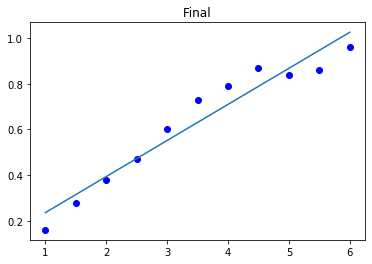

In [2]:
voltaje=np.array([1, 1.5, 2, 2.5, 3, 3.5 , 4, 4.5, 5, 5.5, 6]);
x0=np.ones(voltaje.shape);
corriente=np.array([0.16,0.28,0.38,0.47,0.60,0.73,0.79,0.87,0.84,0.86,0.96]);
X=np.matrix([x0,voltaje]).T;
Y=np.matrix([corriente]).T;

Theta=np.linalg.inv(X.T*X)*(X.T)*Y;
plt.plot(voltaje,corriente, 'bo');
plt.plot(voltaje,Theta[0,0]+Theta[1,0]*voltaje);
plt.title("Final");
plt.show()

y_pred=Theta[0,0]+Theta[1,0]*voltaje;

In [3]:
from sklearn.metrics import r2_score

y_pred = Theta[0, 0] + Theta[1, 0] * voltaje

R2 = r2_score(corriente, y_pred)
print('El R2 es: '+ str(R2))

El R2 es: 0.9385079041558958


##  Seaborn - Visualización de Regresión lineal

###  Básica  :Scatterplot + Fit line + 95% confidence interval

Tenemos los metodos regplot() y lmplot() para mostrar el scaterplot, la linea de ajuste y el intervalo de confianza del 95%.

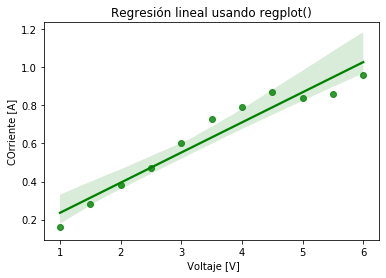

In [4]:
import seaborn as sns

ax= sns.regplot(x=voltaje, y=corriente, color="green");
ax.set_title('Regresión lineal usando regplot()');
ax.set_xlabel(' Voltaje [V]');
ax.set_ylabel('COrriente [A]');


Tenemos el método joinplot() que crea un gráfico de distribución conjunta con histogramas marginales y una línea de regresión. Esto es útil para visualizar la distribución de dos variables y su relación.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version

Text(27.0, 0.5, 'COrriente [A]')

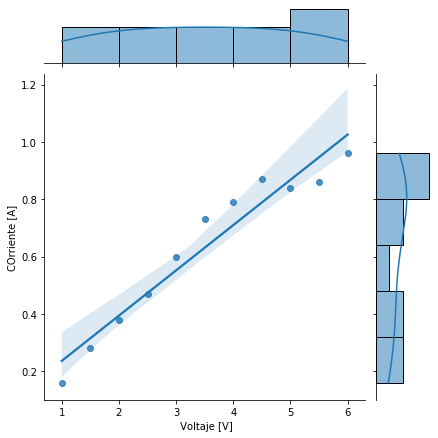

In [5]:
 sns.jointplot(x=voltaje, y=corriente, kind="reg");

plt.xlabel(' Voltaje [V]')
plt.ylabel('COrriente [A]')

residplot() crea una gráfica de dispersión de los residuos (es decir, las diferencias entre los valores predichos y reales) contra la variable independiente. Esto es útil para comprobar los supuestos del modelo de regresión lineal, como la linealidad, la homocedasticidad y la normalidad.

Lo esperado es no observar ningun patron en esta grafica es decir que todos los puntos esten sobre la linea punteada y no se observen patrones extraños, como es en este caso que se observa una pequeña montaña, podemos sospechar de supuestos como linealidad, normalidad y homocedasticidad.

Text(0, 0.5, 'COrriente [A]')

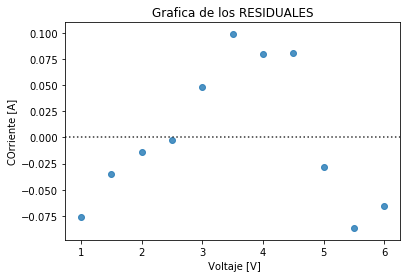

In [6]:
sns.residplot(x=voltaje, y=corriente);
plt.title('Grafica de los RESIDUALES')
plt.xlabel(' Voltaje [V]')
plt.ylabel('COrriente [A]')

Por último uno de los gráficos más importantes, es un gráfico que se utiliza por defecto en un análisis de regresión lineal en R utilizando la libreria ggplot() y es porque es demasiado importante y útil.Este gráfico crea una cuadrícula de diagramas de dispersión para todas las combinaciones de variables, con histogramas en la diagonal y líneas de regresión fuera de la diagonal. Esto es útil para explorar las relaciones entre múltiples variables y sus asociaciones entre sí.

Aca estamos viendo la relación lineal entre x-Y y Y-x pero así mismo la veriamos para toas las X_n que se puedan tener en un problema de regresión múltiple.

Text(0.5, 0.98, 'Pairplot of X y Y')

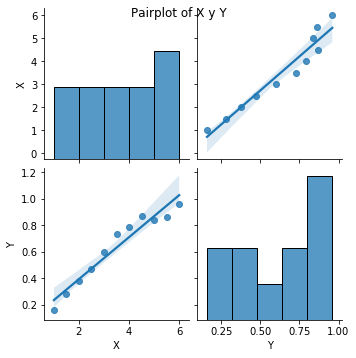

In [7]:
data = {'X': voltaje, 'Y': corriente}
df = pd.DataFrame(data)

sns.pairplot(data=df, kind='reg', diag_kind='hist')

plt.suptitle('Pairplot of X y Y')


# PUNTO FINAL

## Realizar por lo menos 3 regresiones para datos de su preferencia, puede tomarlos como alguna fuente como kaggle o similares. Suponga usted varias funciones de hipótesis, mida usando r². Compare sus resultados.

In [8]:
DF= pd.read_csv('winequality-red.csv', delimiter=';')

El dataset escogido pertenece a UCI Machine Learning Repository, y cuanta con 12 variables entre las que tenemos:
1-  fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
VARIABLE DE SALIDA(based on sensory data):
12 - quality (score between 0 and 10)

Podemos ver que el dataset esta hecho con la intención de predecir la variable categorica 'quality'.

### EDA: Exploratory Data Analysis

In [9]:
DF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
#DF.describe()
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


A partir de la siguiente gráfica podremos ver los scatterplot y las lineas de ajuste para todas nuestras variables y de esta manera escoger nuestra Y de interes y nuestra X de interes para nuestro problema de regresión simple. O inclusive podriamos escoger y determinar varias X

Text(0.5, 0.98, 'Pairplot of X y Y')

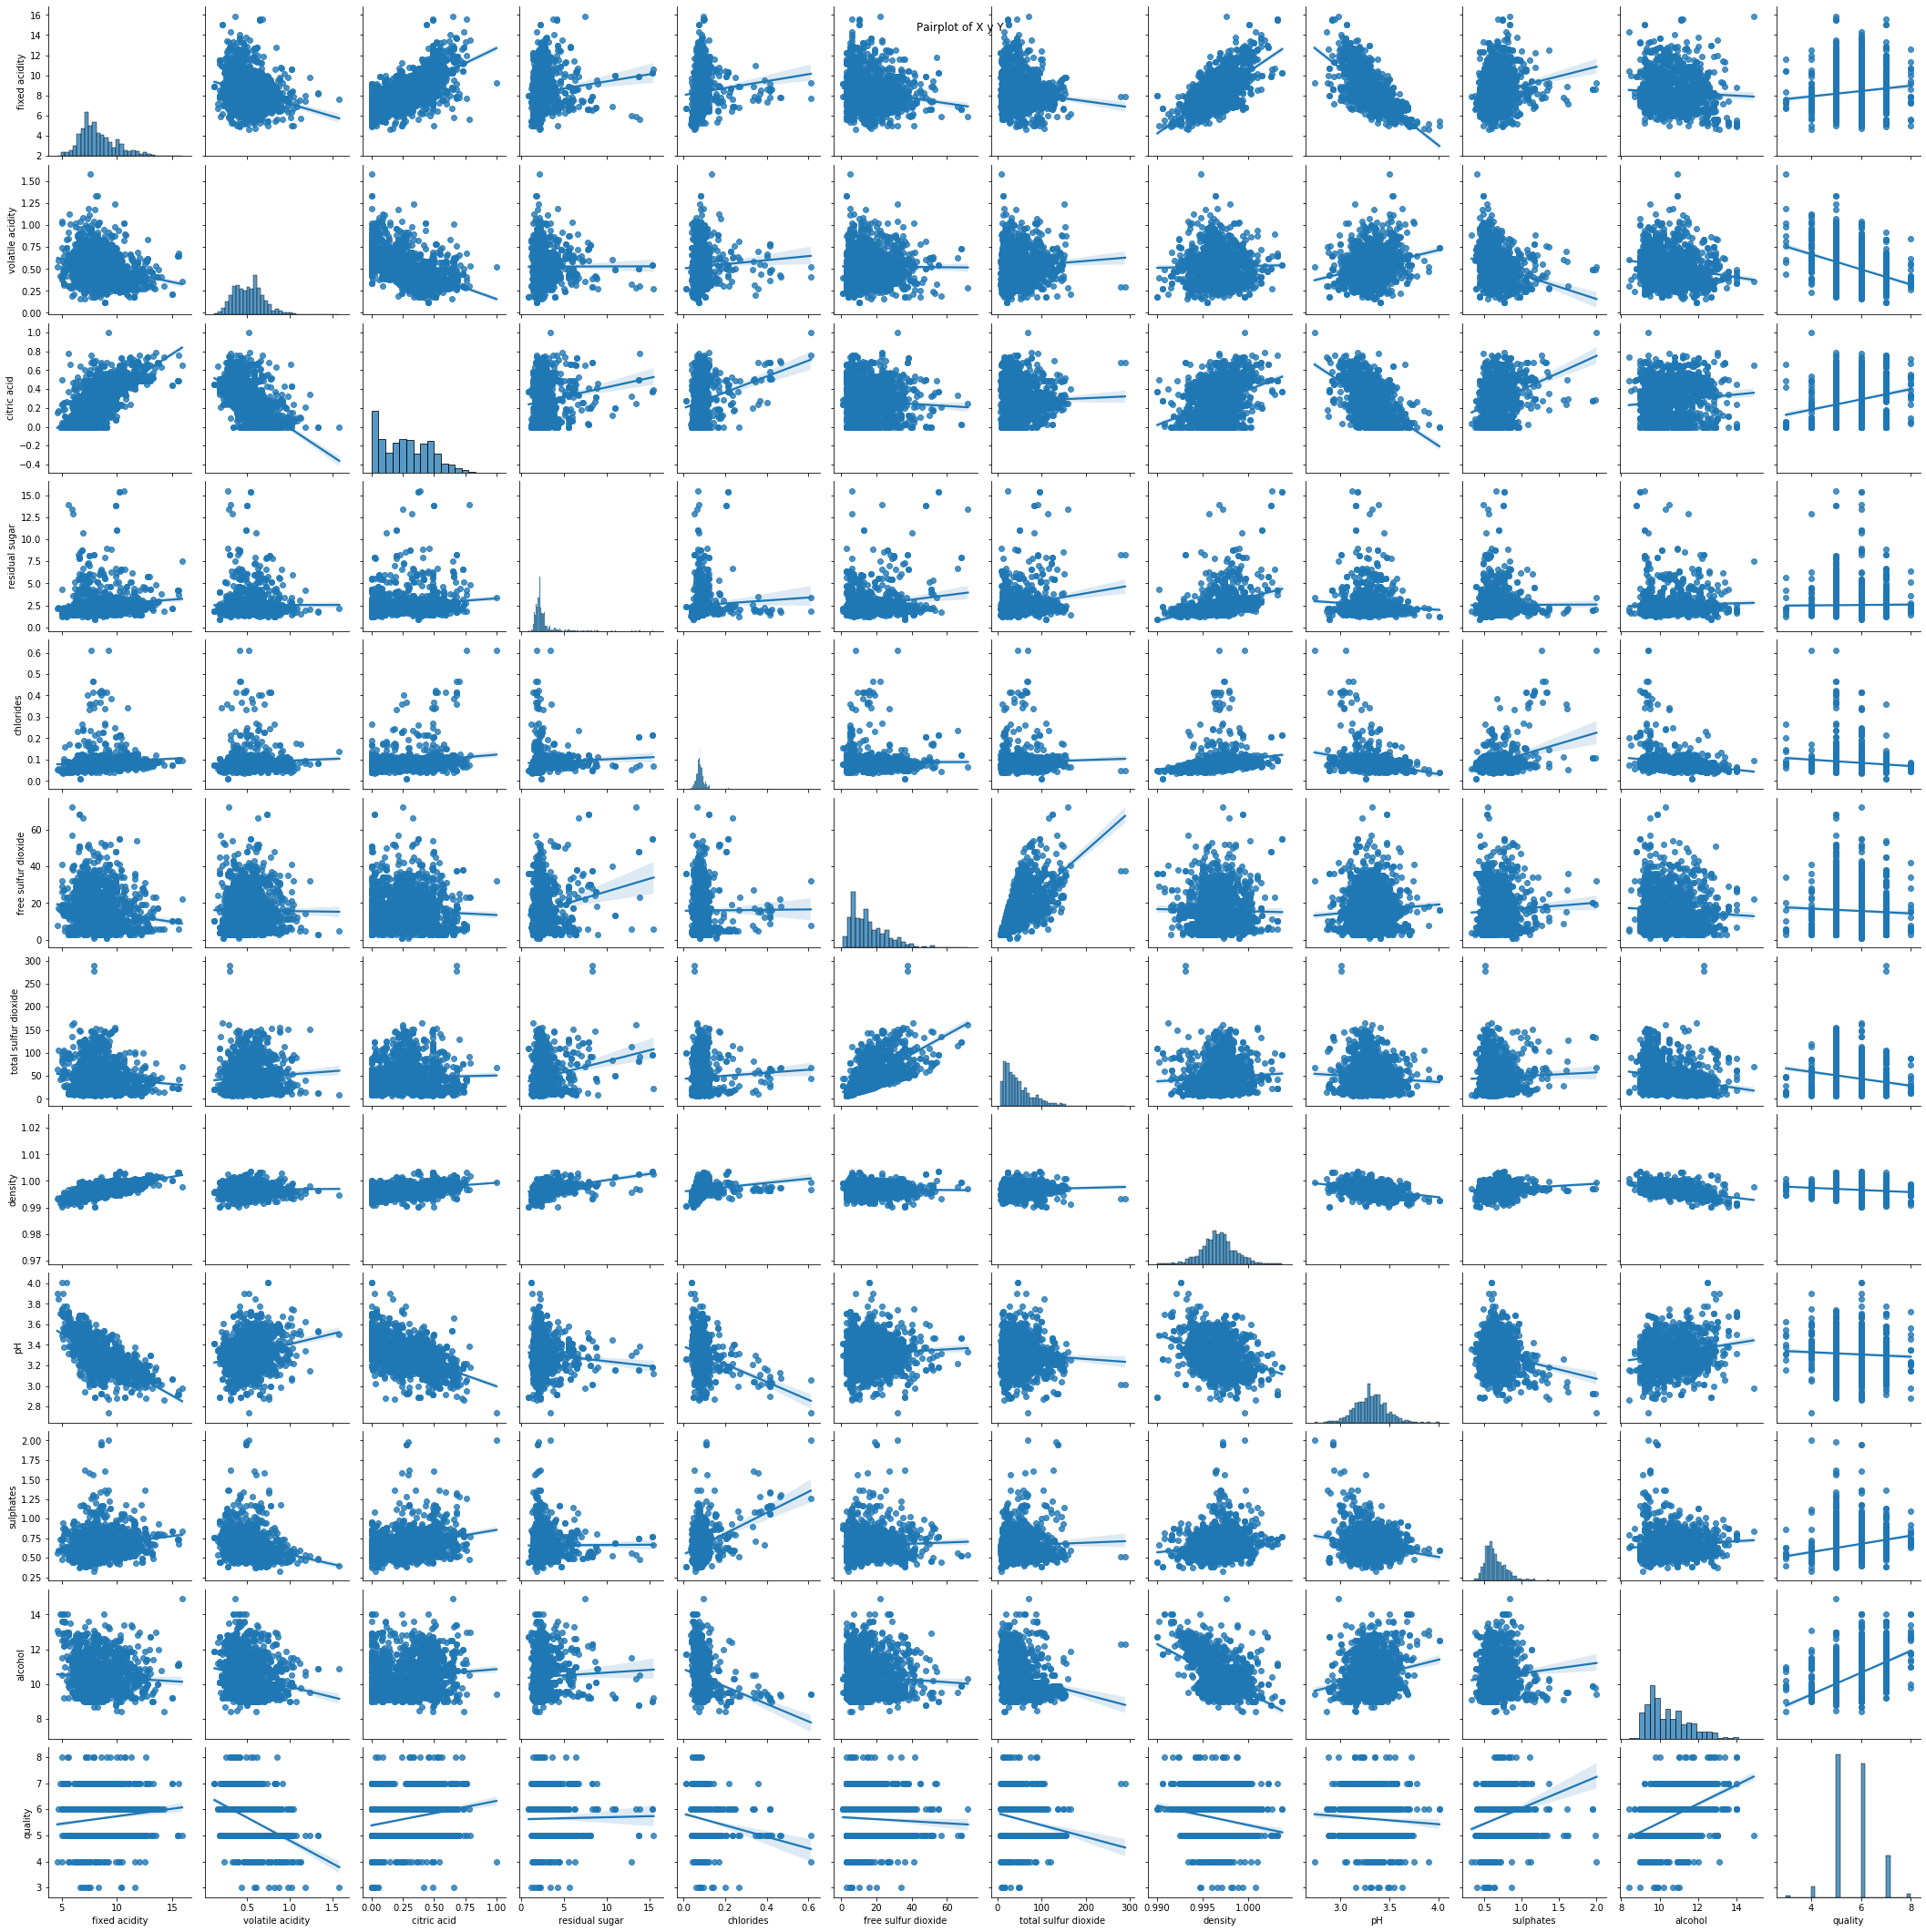

In [11]:
sns.pairplot(data=DF, kind='reg', diag_kind='hist')

plt.suptitle('Pairplot of X y Y')

### Me parece interesante intentar predecir el grado de alcohol basandose en la densidad

In [12]:
X=DF['density'].values
Y=DF['alcohol'].values

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

MODELO 1:  Y~X

MODELO 2:  Y ~ sqrt(X)

MODELO 3:  Y~X^8

In [13]:
from sklearn.linear_model import LinearRegression

model1= LinearRegression();
model1.fit(X,Y);

model2= LinearRegression();
model2.fit(X**0.5,Y);

model3= LinearRegression();
model3.fit(X**8,Y);

In [14]:
y_pred_1 = model1.predict(X)
y_pred_2 = model2.predict(X)
y_pred_3 = model3.predict(X)

In [15]:

R2_1 = r2_score(Y, y_pred_1)
R2_2 = r2_score(Y, y_pred_2)
R2_3 = r2_score(Y, y_pred_3)

print('El R2 del modelo 1 es: '+ str(R2_1))
print('El R2 del modelo 2 es: '+ str(R2_2))
print('El R2 del modelo 3 es: '+ str(R2_3))

El R2 del modelo 1 es: 0.24619436439710696
El R2 del modelo 2 es: -0.7278629167287687
El R2 del modelo 3 es: -0.4984436862329069


Text(0.5, 0.98, 'COMPARACIÓN R^2 PARA DISTINTOS MODELOS DE REGRESIÓN')

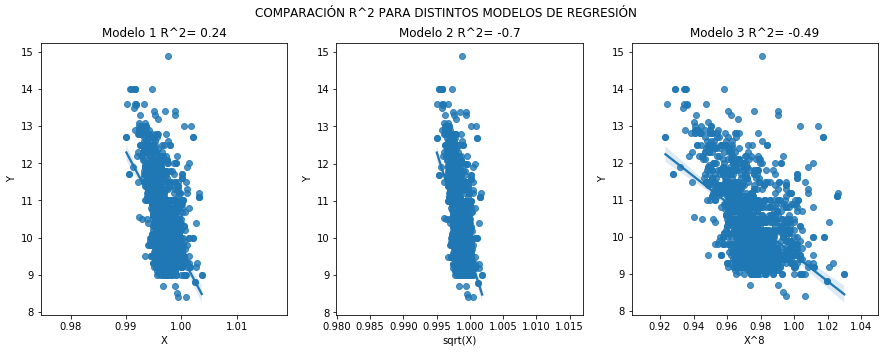

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Plot the data in each subplot using sns.regplot()
sns.regplot(x=X, y=Y, ax=axs[0])
sns.regplot(x=X**0.5, y=Y, ax=axs[1])
sns.regplot(x=X**8, y=Y, ax=axs[2])

axs[0].set_title('Modelo 1 R^2= 0.24')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

axs[1].set_title('Modelo 2 R^2= -0.7')
axs[1].set_xlabel('sqrt(X)')
axs[1].set_ylabel('Y')

axs[2].set_title('Modelo 3 R^2= -0.49')
axs[2].set_xlabel('X^8')
axs[2].set_ylabel('Y')

# Add a title to the figure
fig.suptitle('COMPARACIÓN R^2 PARA DISTINTOS MODELOS DE REGRESIÓN')